In [5]:
import xarray as xr

In [6]:
ds = xr.open_mfdataset("/houston2/pritam/rat_mekong_v3/extras/vic_using_metsim_try3/results/fluxes..2001-04-01.nc")

In [7]:
ds

<xarray.Dataset>
Dimensions:          (lat: 388, lon: 237, nlayer: 2, nv: 2, time: 7376)
Coordinates:
  * time             (time) datetime64[ns] 2001-04-01 2001-04-02 ... 2021-06-10
  * lon              (lon) float64 93.91 93.97 94.03 94.09 ... 108.5 108.6 108.7
  * lat              (lat) float64 33.78 33.72 33.66 33.59 ... 9.719 9.656 9.594
Dimensions without coordinates: nlayer, nv
Data variables: (12/18)
    time_bnds        (time, nv) datetime64[ns] dask.array<chunksize=(7376, 2), meta=np.ndarray>
    OUT_PREC         (time, lat, lon) float32 dask.array<chunksize=(7376, 388, 237), meta=np.ndarray>
    OUT_EVAP         (time, lat, lon) float32 dask.array<chunksize=(7376, 388, 237), meta=np.ndarray>
    OUT_EVAP_CANOP   (time, lat, lon) float32 dask.array<chunksize=(7376, 388, 237), meta=np.ndarray>
    OUT_TRANSP_VEG   (time, lat, lon) float32 dask.array<chunksize=(7376, 388, 237), meta=np.ndarray>
    OUT_EVAP_BARE    (time, lat, lon) float32 dask.array<chunksize=(7376, 388, 237), meta=np.ndarray>
    ...               ...
    OUT_SOIL_TEMP    (time, nlayer, lat, lon) float32 dask.array<chunksize=(7376, 2, 388, 237), meta=np.ndarray>
    OUT_SURF_TEMP    (time, lat, lon) float32 dask.array<chunksize=(7376, 388, 237), meta=np.ndarray>
    OUT_AIR_TEMP     (time, lat, lon) float32 dask.array<chunksize=(7376, 388, 237), meta=np.ndarray>
    OUT_LAI          (time, lat, lon) float32 dask.array<chunksize=(7376, 388, 237), meta=np.ndarray>
    OUT_FCANOPY      (time, lat, lon) float32 dask.array<chunksize=(7376, 388, 237), meta=np.ndarray>
    OUT_ALBEDO       (time, lat, lon) float32 dask.array<chunksize=(7376, 388, 237), meta=np.ndarray>
Attributes:
    title:               VIC History File
    source:              VIC Image Driver
    history:             Created by skahmad on f-hossain-4.ce.washington.edu ...
    references:          Primary Historical Reference for VIC: Liang, X., D. ...
    comment:             Output from the Variable Infiltration Capacity (VIC)...
    Conventions:         CF-1.6
    netcdf_lib_version:  4.7.4 of Dec 14 2020 16:14:56 $
    mpi_lib_version:     MPICH Version:\t3.4.2\nMPICH Release date:\tWed May ...
    VIC_Model_Version:   5.0.1 February 1, 2017
    VIC_GIT_VERSION:     ebed-dirty
    VIC_Driver:          Image

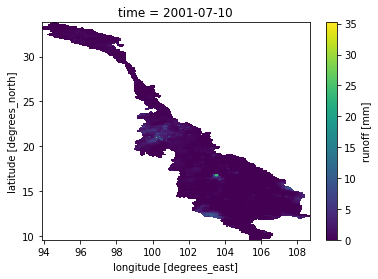

In [9]:
ds.OUT_RUNOFF.isel(time=100).plot()

In [77]:
ds

<xarray.Dataset>
Dimensions:          (lat: 388, lon: 237, nlayer: 2, nv: 2, time: 1)
Coordinates:
  * time             (time) datetime64[ns] 2001-04-01
  * lon              (lon) float64 93.91 93.97 94.03 94.09 ... 108.5 108.6 108.7
  * lat              (lat) float64 9.594 9.656 9.719 9.781 ... 33.66 33.72 33.78
Dimensions without coordinates: nlayer, nv
Data variables: (12/18)
    time_bnds        (time, nv) datetime64[ns] ...
    OUT_PREC         (time, lat, lon) float32 ...
    OUT_EVAP         (time, lat, lon) float32 ...
    OUT_EVAP_CANOP   (time, lat, lon) float32 ...
    OUT_TRANSP_VEG   (time, lat, lon) float32 ...
    OUT_EVAP_BARE    (time, lat, lon) float32 ...
    ...               ...
    OUT_SOIL_TEMP    (time, nlayer, lat, lon) float32 ...
    OUT_SURF_TEMP    (time, lat, lon) float32 ...
    OUT_AIR_TEMP     (time, lat, lon) float32 ...
    OUT_LAI          (time, lat, lon) float32 ...
    OUT_FCANOPY      (time, lat, lon) float32 ...
    OUT_ALBEDO       (time, lat, lon) float32 ...
Attributes:
    title:               VIC History File
    source:              VIC Image Driver
    history:             Created by skahmad on f-hossain-4.ce.washington.edu ...
    references:          Primary Historical Reference for VIC: Liang, X., D. ...
    comment:             Output from the Variable Infiltration Capacity (VIC)...
    Conventions:         CF-1.6
    netcdf_lib_version:  4.7.4 of Dec 14 2020 16:14:56 $
    mpi_lib_version:     MPICH Version:\t3.4.2\nMPICH Release date:\tWed May ...
    VIC_Model_Version:   5.0.1 February 1, 2017
    VIC_GIT_VERSION:     ebed-dirty
    VIC_Driver:          Image

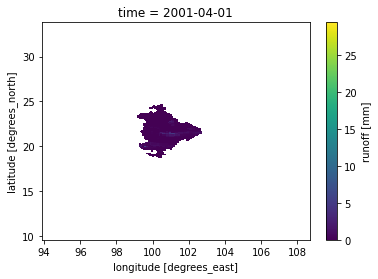

In [79]:
ds.OUT_RUNOFF.plot()

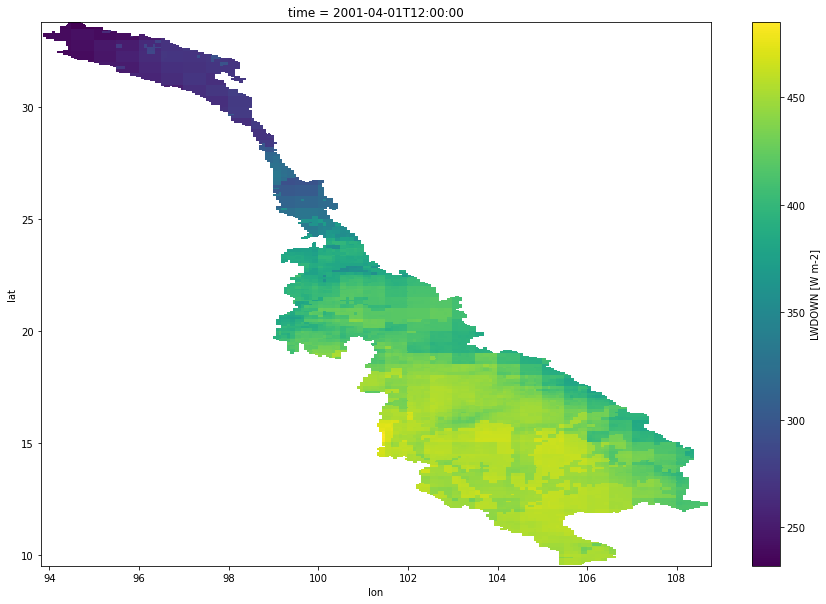

In [46]:
# Let's check the forcings
xr.open_dataset("../backend/data/forcings/forcings_proleptic_gregorian_2001.nc").longwave.isel(time=3).plot(size=10)

In [52]:
ds.OUT_RUNOFF.sel(lat=20.031, lon=101.031)

<xarray.DataArray 'OUT_RUNOFF' (time: 6)>
array([0.008763, 0.088578, 0.108593, 0.129437, 0.151184, 0.173922],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2001-04-01 ... 2001-04-01T20:00:00.000013
    lon      float64 101.0
    lat      float64 20.03
Attributes:
    long_name:      runoff
    standard_name:  runoff_amount
    units:          mm
    description:    surface runoff
    cell_methods:   time: sum

In [51]:
ds.lon[ds.lon>101]

<xarray.DataArray 'lon' (lon: 123)>
array([101.031, 101.094, 101.156, 101.219, 101.281, 101.344, 101.406, 101.469,
       101.531, 101.594, 101.656, 101.719, 101.781, 101.844, 101.906, 101.969,
       102.031, 102.094, 102.156, 102.219, 102.281, 102.344, 102.406, 102.469,
       102.531, 102.594, 102.656, 102.719, 102.781, 102.844, 102.906, 102.969,
       103.031, 103.094, 103.156, 103.219, 103.281, 103.344, 103.406, 103.469,
       103.531, 103.594, 103.656, 103.719, 103.781, 103.844, 103.906, 103.969,
       104.031, 104.094, 104.156, 104.219, 104.281, 104.344, 104.406, 104.469,
       104.531, 104.594, 104.656, 104.719, 104.781, 104.844, 104.906, 104.969,
       105.031, 105.094, 105.156, 105.219, 105.281, 105.344, 105.406, 105.469,
       105.531, 105.594, 105.656, 105.719, 105.781, 105.844, 105.906, 105.969,
       106.031, 106.094, 106.156, 106.219, 106.281, 106.344, 106.406, 106.469,
       106.531, 106.594, 106.656, 106.719, 106.781, 106.844, 106.906, 106.969,
       107.031, 107.094, 107.156, 107.219, 107.281, 107.344, 107.406, 107.469,
       107.531, 107.594, 107.656, 107.719, 107.781, 107.844, 107.906, 107.969,
       108.031, 108.094, 108.156, 108.219, 108.281, 108.344, 108.406, 108.469,
       108.531, 108.594, 108.656])
Coordinates:
  * lon      (lon) float64 101.0 101.1 101.2 101.2 ... 108.5 108.5 108.6 108.7
Attributes:
    long_name:      longitude
    units:          degrees_east
    standard_name:  longitude

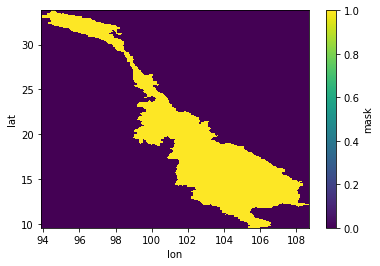

In [56]:
# Checking domain
xr.open_dataset("/houston2/pritam/rat_mekong_v3/backend/params/vic/domain.nc").mask.plot()

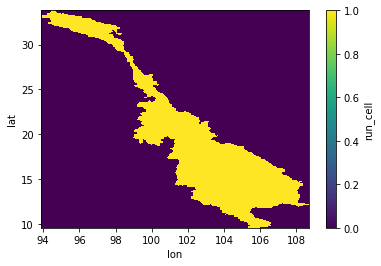

In [57]:
# Checking run_cell
xr.open_dataset("/houston2/pritam/rat_mekong_v3/backend/params/vic/params_all_mekong.nc").run_cell.plot()